
# Implementando uma regressão linear simples, e visualizando como a escolha de uma variável independente com alta correlação com o a variável contínua pode melhorar a performance do modelo.

Quando utilizamos os modelos de Regressão? Quando queremos prever uma variável contínua, isto é, um valor numérico.

Nesse projeto, iremos aprender um pouco mais sobre a biblioteca [scikit-learn](https://scikit-learn.org/stable/index.html) utilizando um dataset próprio dela para aplicarmos dentro do modelo de Regressão Linear.

Em linhas gerais, iremos desenvolver um modelo de Regressão Linear **SIMPLES** (Apenas uma variável de entrada X e uma de saída Y) para modelar a precificação de casas em Boston nos Estados Unidos. 


### STEPS
- Importar os dados e criar o Dataframe;
- Realizar um EDA
- Escolher 3 atributos para utilizar como X do modelo
- Treinar o modelo de Regressão Linear simples para cada atributo e avaliar qual melhor modelo.

Para acessar esses dados, basta seguir o passo a passo abaixo.

In [57]:
# Importação do dataset California House Pricing

from sklearn.datasets import fetch_california_housing
datset = fetch_california_housing()
print(type(dataset))

<class 'sklearn.utils.Bunch'>


Dando uma olhada mais a fundo no tipo do dataset, vemos que ele é um *sklearn.utils.Bunch*, uma espécie de objeto do sklearn. Em seguida, acessaremos seus atributos e veremos o que eles significam.

In [58]:
# Verificando os atributos do objeto
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [59]:
# Acessando o atributos do objeto
dataset['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Dentro dos atributos, vemos que o dataset é composto são:
- 'data': Os dados numéricos do dataset;
- 'target': A variável alvo (O que queremos prever);
- 'feature_names': Nome das colunas;
- 'DESCR': Esse vocês irão acessar e descobrir;
- 'filename': Esse vocês irão acessar e descobrir.

Os pŕoximos passos agora é com você!

### 1 - 0 Criação do DataFrame


In [60]:
# Importação das bibliotecas e montagem do dataframe, pois o arquivo não vem no formato dataframe.
import pandas as pd

''' Descrições das colunas (Fornecidos no dataset['feature_names'])
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's
'''

# Montagem do dataframe
df = pd.DataFrame(dataset.get('data'),columns=dataset.get('feature_names'))
df["PRICE"] = dataset.get('target')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Você deve então, com esse Dataset formado Escolher 3 dos 13 atributos para criar 3 modelos e averiguar qual destes é melhor para prever o Preço da casa. Como deve-se fazer isso? **EDA**

## 1 - 1 Importação das bibliotacas 

In [61]:
# Importação das bibliotecas

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression #Ref: https://scikit-learn.org/stable/modules/linear_model.html
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #Ref: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

## 1 - 2 EDA

Você deve escolher quais serão as 3 melhores colunas para utilizarmos através do EDA e não treinando 13 modelos.

### Primeiro contato

- Head
- Describe
- Info/ Valores ausentes

In [62]:
# mostra os 5 primeiros valores do dataframe
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [63]:
# mostra as estáisticas descritivas do dataset
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [64]:
# mostra todas as informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [65]:
# mostra as colunas do dataset
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

### Análise Gráfica

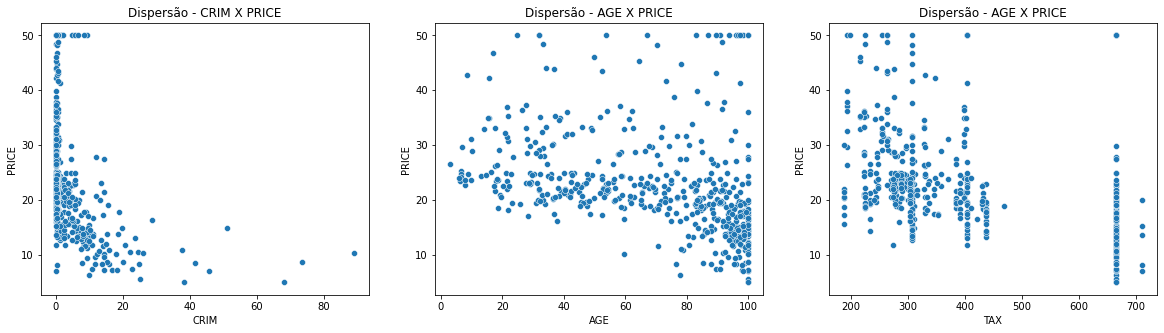

In [66]:
# Exploração dos dados de maneira visual, para ver quais 
#que provavelmente irão apresentar uma correlação (Não é o melhor método, mas é válido)
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(x='CRIM', y='PRICE' ,data=df)
plt.title("Dispersão - CRIM X PRICE")

plt.subplot(1,3,2)
sns.scatterplot(x='AGE', y='PRICE' ,data=df)
plt.title("Dispersão - AGE X PRICE")

plt.subplot(1,3,3)
sns.scatterplot(x='TAX', y='PRICE' ,data=df)
plt.title("Dispersão - AGE X PRICE")

plt.show()

### Gráfico de correlação e escolha do atributo

De todas as colunas do nosso Dataset, quais aqueles que provavelmente terá melhor desempenho no modelo? Aqueles que terão maior correlação com o Preço da casa (Tanto positiva quanto negativa)

<AxesSubplot:>

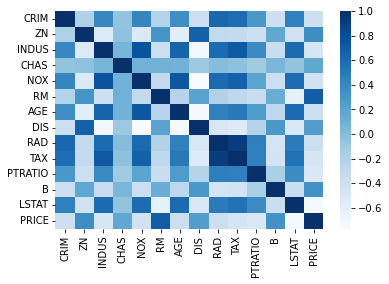

In [67]:
sns.heatmap(df.corr(),cmap="Blues")

In [68]:
df.corr()['PRICE'].abs().sort_values(ascending=False)

PRICE      1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: PRICE, dtype: float64

Baseado na análise de correlação, escolha 3 variáveis para utilizarmos como parâmetro de treinamento são:
RESPOSTA:
- LSTAT      0.737663
- RM         0.695360
- PTRATIO    0.507787

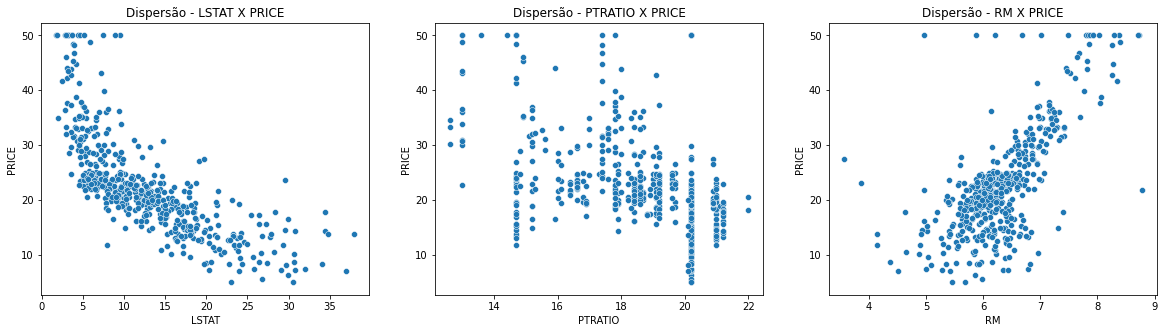

In [69]:
# Realizando a construção do gráfico de dispersão para os escolhidos

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(x='LSTAT', y='PRICE' ,data=df)
plt.title("Dispersão - LSTAT X PRICE")

plt.subplot(1,3,2)
sns.scatterplot(x='PTRATIO', y='PRICE' ,data=df)
plt.title("Dispersão - PTRATIO X PRICE")

plt.subplot(1,3,3)
sns.scatterplot(x='RM', y='PRICE' ,data=df)
plt.title("Dispersão - RM X PRICE")
plt.show()

### Comparação dos gráficos de dispersão

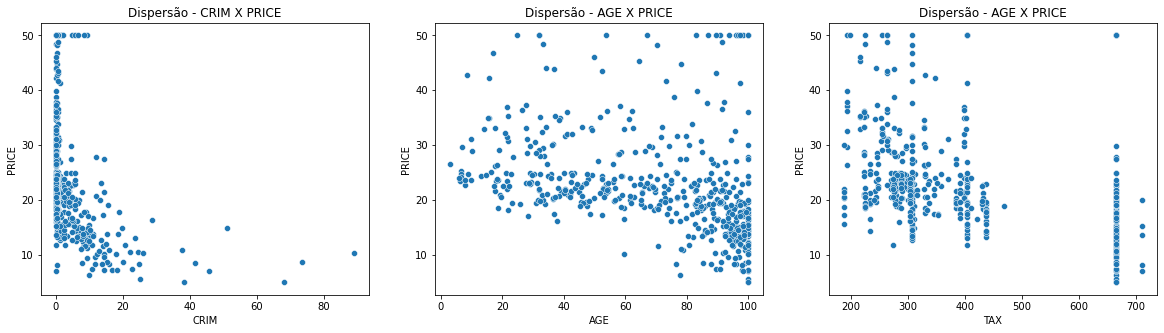

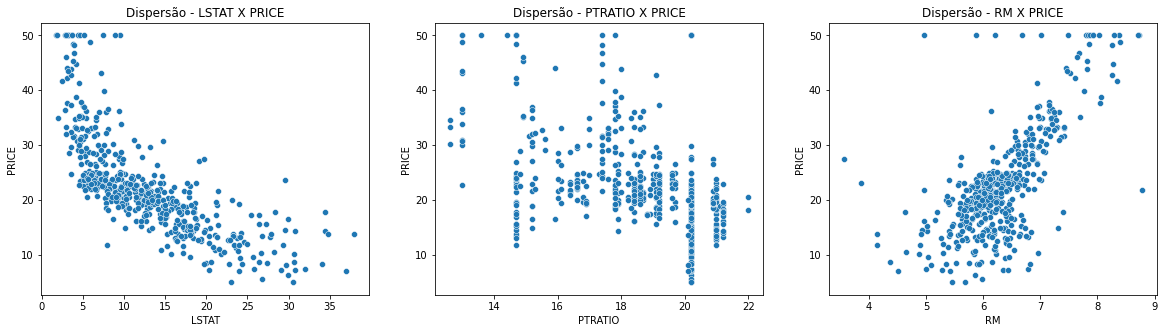

In [70]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(x='CRIM', y='PRICE' ,data=df)
plt.title("Dispersão - CRIM X PRICE")

plt.subplot(1,3,2)
sns.scatterplot(x='AGE', y='PRICE' ,data=df)
plt.title("Dispersão - AGE X PRICE")

plt.subplot(1,3,3)
sns.scatterplot(x='TAX', y='PRICE' ,data=df)
plt.title("Dispersão - AGE X PRICE")


plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(x='LSTAT', y='PRICE' ,data=df)
plt.title("Dispersão - LSTAT X PRICE")

plt.subplot(1,3,2)
sns.scatterplot(x='PTRATIO', y='PRICE' ,data=df)
plt.title("Dispersão - PTRATIO X PRICE")

plt.subplot(1,3,3)
sns.scatterplot(x='RM', y='PRICE' ,data=df)
plt.title("Dispersão - RM X PRICE")

plt.show()

Observando o gráfico de cima com os de baixo, é possível perceber uma maior lineariedade com os valores de baixo.

## 1 - 3 Separação Treino X Teste

In [71]:
# Separar os valores de atributo e alvo

X = df[['LSTAT','RM','PTRATIO']]
y = df['PRICE']

# Separar o conjunto em Treino/ Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [72]:
X_train.head()

,LSTAT,RM,PTRATIO
398,30.59,5.453,20.2
340,9.29,5.968,20.2
245,18.46,5.605,19.1
57,3.95,6.816,15.1
497,14.10,5.794,19.2


## 1 - 4 Treinamentos e validação dos modelos

Atentar-se ao fato de que estamos analisando apenas modelos **SIMPLES** isto é um X e um Y

### Treinar o modelo

In [73]:
# Chamar a função do Modelo para cada variável
LinReg1 = LinearRegression() # Para o LSTAT
LinReg2 = LinearRegression() # Para o RM
LinReg3 = LinearRegression() # Para o PTRATIO

Tenta achar um jeito de resolver esse erro **ValueError** em baixo.

In [74]:
# Treinar o modelo
LinReg1.fit(X_train['LSTAT'],y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[30.59  9.29 18.46  3.95 14.1  20.85  9.52  7.01 12.43 14.7   4.67 17.93
 10.59  4.16  7.7  11.69  4.56 13.61 21.46 13.98  9.8   6.43  5.12 18.85
  9.88 12.79  9.97 20.31  6.75 29.93  5.7  16.23 14.81 14.81 18.13 11.34
 18.71  5.39  3.53 16.14  3.54  7.18  3.81  4.61  6.19  8.47  5.49 26.82
  3.92 13.28  8.43 14.65 19.31  8.05  9.25  7.6  10.36 13.27 17.44  2.94
  7.83 13.35  8.01  4.86  7.73  5.29 10.56  9.68 11.72 11.32 13.34  9.5
 14.33  4.59 17.92 18.06 16.51 24.39  9.1   5.68 12.6  15.94 30.62 27.8
  6.93  4.73 12.01 13.65 16.21 18.76  7.44  4.84  7.67 19.92 18.8   8.79
  5.98 10.16  3.56 14.64  3.7   6.36 21.24  8.16 27.38  2.97 11.5   9.64
  9.51 24.1  15.76 12.8  11.1  21.78  7.39  5.1  10.4  21.45  4.54  1.73
 14.37 12.67  7.54 14.19 18.66 11.66 10.97  3.95  8.58 11.38  5.64 10.53
 30.81 16.2  29.68 20.08 34.37  6.56 16.74 12.12  6.21  6.58 21.32 24.91
  8.94 23.34 21.32 15.03  9.53 12.93 10.58  6.92 17.16 22.88  3.76  2.98
  7.88  6.58  9.97  9.67 14.13 19.15  6.36 11.41 12.4   9.47 17.27  6.48
 17.73  3.59 14.69  3.53  7.2   4.98  7.26  6.05  8.67 23.09 17.31 34.41
 24.08  3.16  4.45 21.02 19.69 34.77 23.98 14.66  9.38 15.7  12.26 11.22
 29.05 14.67 23.27  8.05 20.32 19.77  5.08  9.93 26.4   6.72 14.8   9.08
  6.73 13.99 15.79 10.88 12.27 11.25 15.71  5.33 18.72 16.47  5.04 25.79
 15.1  12.43  9.04 17.28 13.44 17.19 25.68 15.17  5.5  23.98 13.15 17.64
  5.33 10.29  2.88  5.57  4.59 10.45 18.33  7.14  8.1  11.12  3.13 21.52
  4.81  8.2  14.15 14.44 14.79 26.45 14.36 17.11  6.57 15.37  8.77 19.88
 12.64 15.84  9.54  4.82 13.04 10.5  17.15  2.47 12.73  5.89  7.79 12.92
 13.44  7.9  13.45  7.44 17.09 14.59 14.27  2.87  8.44 29.55  5.9  16.44
  7.51 21.14 13.51 26.77 12.67 18.35 13.15 15.02  6.65 12.86  6.36  9.69
  3.11 13.09 10.11  8.81 11.28  9.22 23.69  6.59 30.63  4.32 16.03 28.28
 17.1   8.26 15.02  7.79  7.53 23.79  6.62  4.97 10.26 16.3  11.64  7.39
 10.11  7.79 10.63 16.9  25.41  4.7  29.29 13.27 20.34  6.07  8.93 10.21
 16.94 10.15 16.96 18.06  6.68 16.22 11.48 12.87 13.33  9.14  5.19  3.73
  1.92  4.56 14.98 18.46  1.98 36.98 11.45 10.27 14.    5.81  9.28  5.91
  4.08  3.01 28.32 29.97 17.12 27.71  3.32  3.26 10.13 11.65  5.28  8.1
 10.3  11.97  5.49  7.22  3.11 15.17 17.27 16.29 14.1   4.5   7.85 15.69
  8.23 21.22  7.43  6.72 23.6   4.74  8.88 10.24 24.56 18.07 15.55 22.98
  5.77  6.12 17.6  12.04 15.39  8.05 10.74  7.34  9.62  9.43 31.99  8.65
 17.21  5.68 19.37  4.45  9.74  5.21 10.87  9.71].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Neste caso ele pede para reformular a as dimensões dos dados

In [75]:
# Treinar o modelo

LinReg1.fit(X_train['LSTAT'].values.reshape(-1,1),y_train)

LinearRegression()

### Calcular as métricas

- Fórmula da regressão
- MSE
- RMSE
- R²

In [76]:


# Predizer os valores de teste

y_pred_1 = LinReg1.predict(X_test['LSTAT'].values.reshape(-1,1))


# Calcular as métricas do modelo

print("Fórmula: y = {} {} x".format(LinReg1.intercept_,LinReg1.coef_[0]))
print("MSE: {}".format(metrics.mean_absolute_error(y_test,y_pred_1)))
print("RMSE: {}".format(metrics.mean_squared_error(y_test,y_pred_1)))
print("R²: {}".format(metrics.r2_score(y_test,y_pred_1)))


Fórmula: y = 34.556336088329914 -0.9525185720651552 x
MSE: 4.300999574761152
RMSE: 35.21258076482308
R²: 0.5838667794207535


### Criar uma visualização do modelo


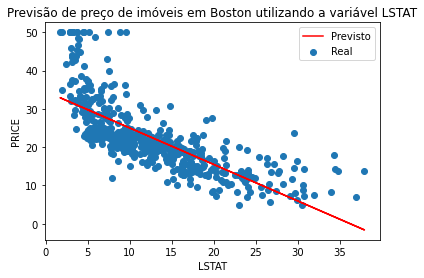

In [77]:
y_pred_total = LinReg1.predict(X['LSTAT'].values.reshape(-1,1))
plt.scatter('LSTAT','PRICE',data=df,label='Real')
plt.plot(df['LSTAT'],y_pred_total,label='Previsto', color='r')
plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.title('Previsão de preço de imóveis em Boston utilizando a variável LSTAT')
plt.legend()

plt.show()

### Repetir procedimento

Realizar o mesmo procedimento para as outras 2 variáveis

Fórmula: y = -37.76412728094389 9.6155043105187 x
MSE: 4.954738718876509
RMSE: 53.53154076469683
R²: 0.3673780229355923


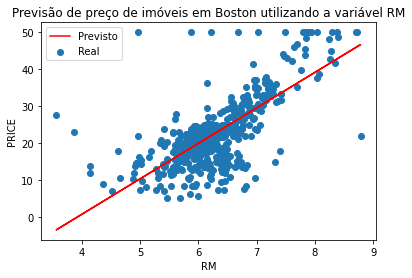

In [78]:
# Treinar o modelo

LinReg2.fit(X_train['RM'].values.reshape(-1,1),y_train)

# Predizer os valores de teste

y_pred_2 = LinReg2.predict(X_test['RM'].values.reshape(-1,1))


# Calcular as métricas do modelo
print("Fórmula: y = {} {} x".format(LinReg2.intercept_,LinReg2.coef_[0]))
print("MSE: {}".format(metrics.mean_absolute_error(y_test,y_pred_2)))
print("RMSE: {}".format(metrics.mean_squared_error(y_test,y_pred_2)))
print("R²: {}".format(metrics.r2_score(y_test,y_pred_2)))

y_pred_total = LinReg2.predict(X['RM'].values.reshape(-1,1))
plt.scatter('RM','PRICE',data=df,label='Real')
plt.plot(df['RM'],y_pred_total,label='Previsto', color='r')
plt.xlabel('RM')
plt.ylabel('PRICE')
plt.title('Previsão de preço de imóveis em Boston utilizando a variável RM')
plt.legend()

plt.show()


Fórmula: y = 64.68881436983216 -2.283827516072179 x
MSE: 6.367301412121811
RMSE: 72.02656393609695
R²: 0.14880859718389838


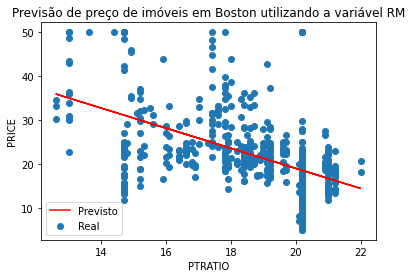

In [79]:
# Treinar o modelo

LinReg3.fit(X_train['PTRATIO'].values.reshape(-1,1),y_train)

# Predizer os valores de teste

y_pred_3 = LinReg3.predict(X_test['PTRATIO'].values.reshape(-1,1))


# Calcular as métricas do modelo
print("Fórmula: y = {} {} x".format(LinReg3.intercept_,LinReg3.coef_[0]))
print("MSE: {}".format(metrics.mean_absolute_error(y_test,y_pred_3)))
print("RMSE: {}".format(metrics.mean_squared_error(y_test,y_pred_3)))
print("R²: {}".format(metrics.r2_score(y_test,y_pred_3)))


y_pred_total = LinReg3.predict(X['PTRATIO'].values.reshape(-1,1))
plt.scatter('PTRATIO','PRICE',data=df,label='Real')
plt.plot(df['PTRATIO'],y_pred_total,label='Previsto',color='r')
plt.xlabel('PTRATIO')
plt.ylabel('PRICE')
plt.title('Previsão de preço de imóveis em Boston utilizando a variável RM')
plt.legend()

plt.show()


## 1 - 5 Qual o melhor modelo?

Analise graficamente e com as métricas para chegar na conslusão.

Fórmula: y = 34.556336088329914 -0.9525185720651552 x
MSE: 4.300999574761152
RMSE: 35.21258076482308
R²: 0.5838667794207535


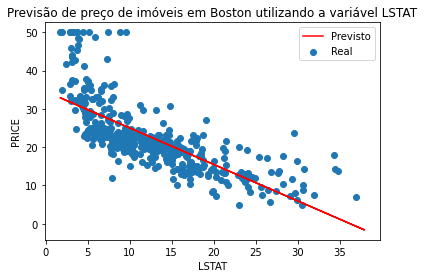

Fórmula: y = -37.76412728094389 9.6155043105187 x
MSE: 4.954738718876509
RMSE: 53.53154076469683
R²: 0.3673780229355923


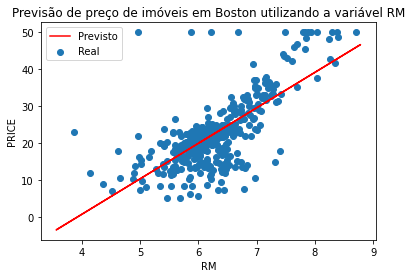

Fórmula: y = 64.68881436983216 -2.283827516072179 x
MSE: 6.367301412121811
RMSE: 72.02656393609695
R²: 0.14880859718389838


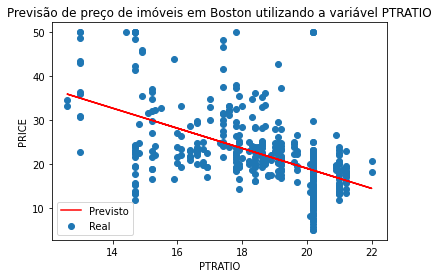

In [81]:
# Chamar a função do Modelo
LinReg = LinearRegression() # Para o LSTAT


for i in X.columns:
  # Treinar o modelo
  LinReg.fit(X_train[i].values.reshape(-1,1),y_train)

  # Predizer os valores de teste
  y_pred = LinReg.predict(X_test[i].values.reshape(-1,1))

  # Calcular as métricas do modelo
  print("Fórmula: y = {} {} x".format(LinReg.intercept_,LinReg.coef_[0]))
  print("MSE: {}".format(metrics.mean_absolute_error(y_test,y_pred)))
  print("RMSE: {}".format(metrics.mean_squared_error(y_test,y_pred)))
  print("R²: {}".format(metrics.r2_score(y_test,y_pred)))

  #X_norm = scaler.transform(X[i])

  y_pred_total = LinReg.predict(X[i].values.reshape(-1,1))
  plt.scatter(X_train[i],y_train,label='Real')
  plt.plot(X[i],y_pred_total,label='Previsto',color='r')
  plt.xlabel(i)
  plt.ylabel('PRICE')
  plt.title('Previsão de preço de imóveis em Boston utilizando a variável ' + i)
  plt.legend()

  plt.show()


O melhor modelo é aquele que utiliza a variável LSTAT, pois pode-se ver a melhor distribuição dos dados dessa variável em torno da reta de regressão linear. Podemos ver nas métricas que a performance do modelo mesmo assim não foi muito perfeita, porém melhorar parâmetros e encontrar o melhor modelo não foi o objetivo deste projeto. O objetivo foi encontrar a melhor variável independente para criar o modelo de previsão. O modelo foi bem simples com apenas uma variável (Regressão simples), porém no dia a dia, trabalha-se com diversas variáveis para prever um target (regressões múltiplas), porém o intuito é o mesmo, não adianta treinar vários modelos e testar, se não for escolhido variáveis independentes para o treinamento com altas correlações com o target, o modelo nunca alcançará uma boa performance.